In [1]:
import string
import random
import glob
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
%matplotlib inline

HEIGHT = 80
WIDTH = 600
FONT_SIZE = 32
FONT_FOLDER = "../data/fonts/*"

In [6]:
class DataGenerator:
    def __init__(self, all_chars, batch_size):
        self.all_chars = all_chars
        self.batch_size = batch_size
    
    def _generate_dict(self):
        num_chars = len(self.all_chars)

        char2label = dict((char, i) for i, char in enumerate(self.all_chars))
        label2char = dict((i, char) for i, char in enumerate(self.all_chars))

        return char2label, label2char


    def _generate_strings_in_batch(self, length, variance=0):
        char2label, label2char = self._generate_dict()

        strings = []
        labels = []

        for i in range(self.batch_size):
            # rand = random.random()
            the_length = length + np.random.randint(-variance, variance+1)
            the_string = "".join([random.choice(self.all_chars[:len(self.all_chars)]) for _ in range(the_length)])
            print(f"{the_length}: {the_string}")

            the_label = [char2label[char] for char in the_string]
            strings.append(the_string)
            labels.append(np.array(the_label))

        return strings, labels

    def _create_image(self, size, message, font):
        width, height = size
        image = Image.new('RGB', size, 'white')
        draw = ImageDraw.Draw(image)
        w, h = font.getsize(message)
        # print(w)
        draw.text(((width-w)/2, (height-h)/2), message, font=font, fill='black')
        return image

    def _get_random_font_from_folder(self, path=FONT_FOLDER):
        font_files = glob.glob(path)
        font_file = random.choice(font_files)
        font = ImageFont.truetype(font_file, FONT_SIZE)

        return font

    def _generate_images_from_strings(self, strings):
        font = self._get_random_font_from_folder()
        images = []
        for word in strings:
            pil_img = self._create_image((WIDTH, HEIGHT), word, font)
            images.append(pil_img)

        return images
    
    def __getitem__(self, index):
        strings, labels = self._generate_strings_in_batch(14, 2)
        imgs = self._generate_images_from_strings(strings)
        return imgs, strings

13: 2AB7B6889959A
16: 9433637201724744
14: A1535584869630
12: 525B08A56A1A
13: 19815B7341172
15: 6BB385B31B652B2
14: 00A78883885385
16: 8B731812A9576B24
13: 2B37847597001
15: 28A3A26814093B1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.


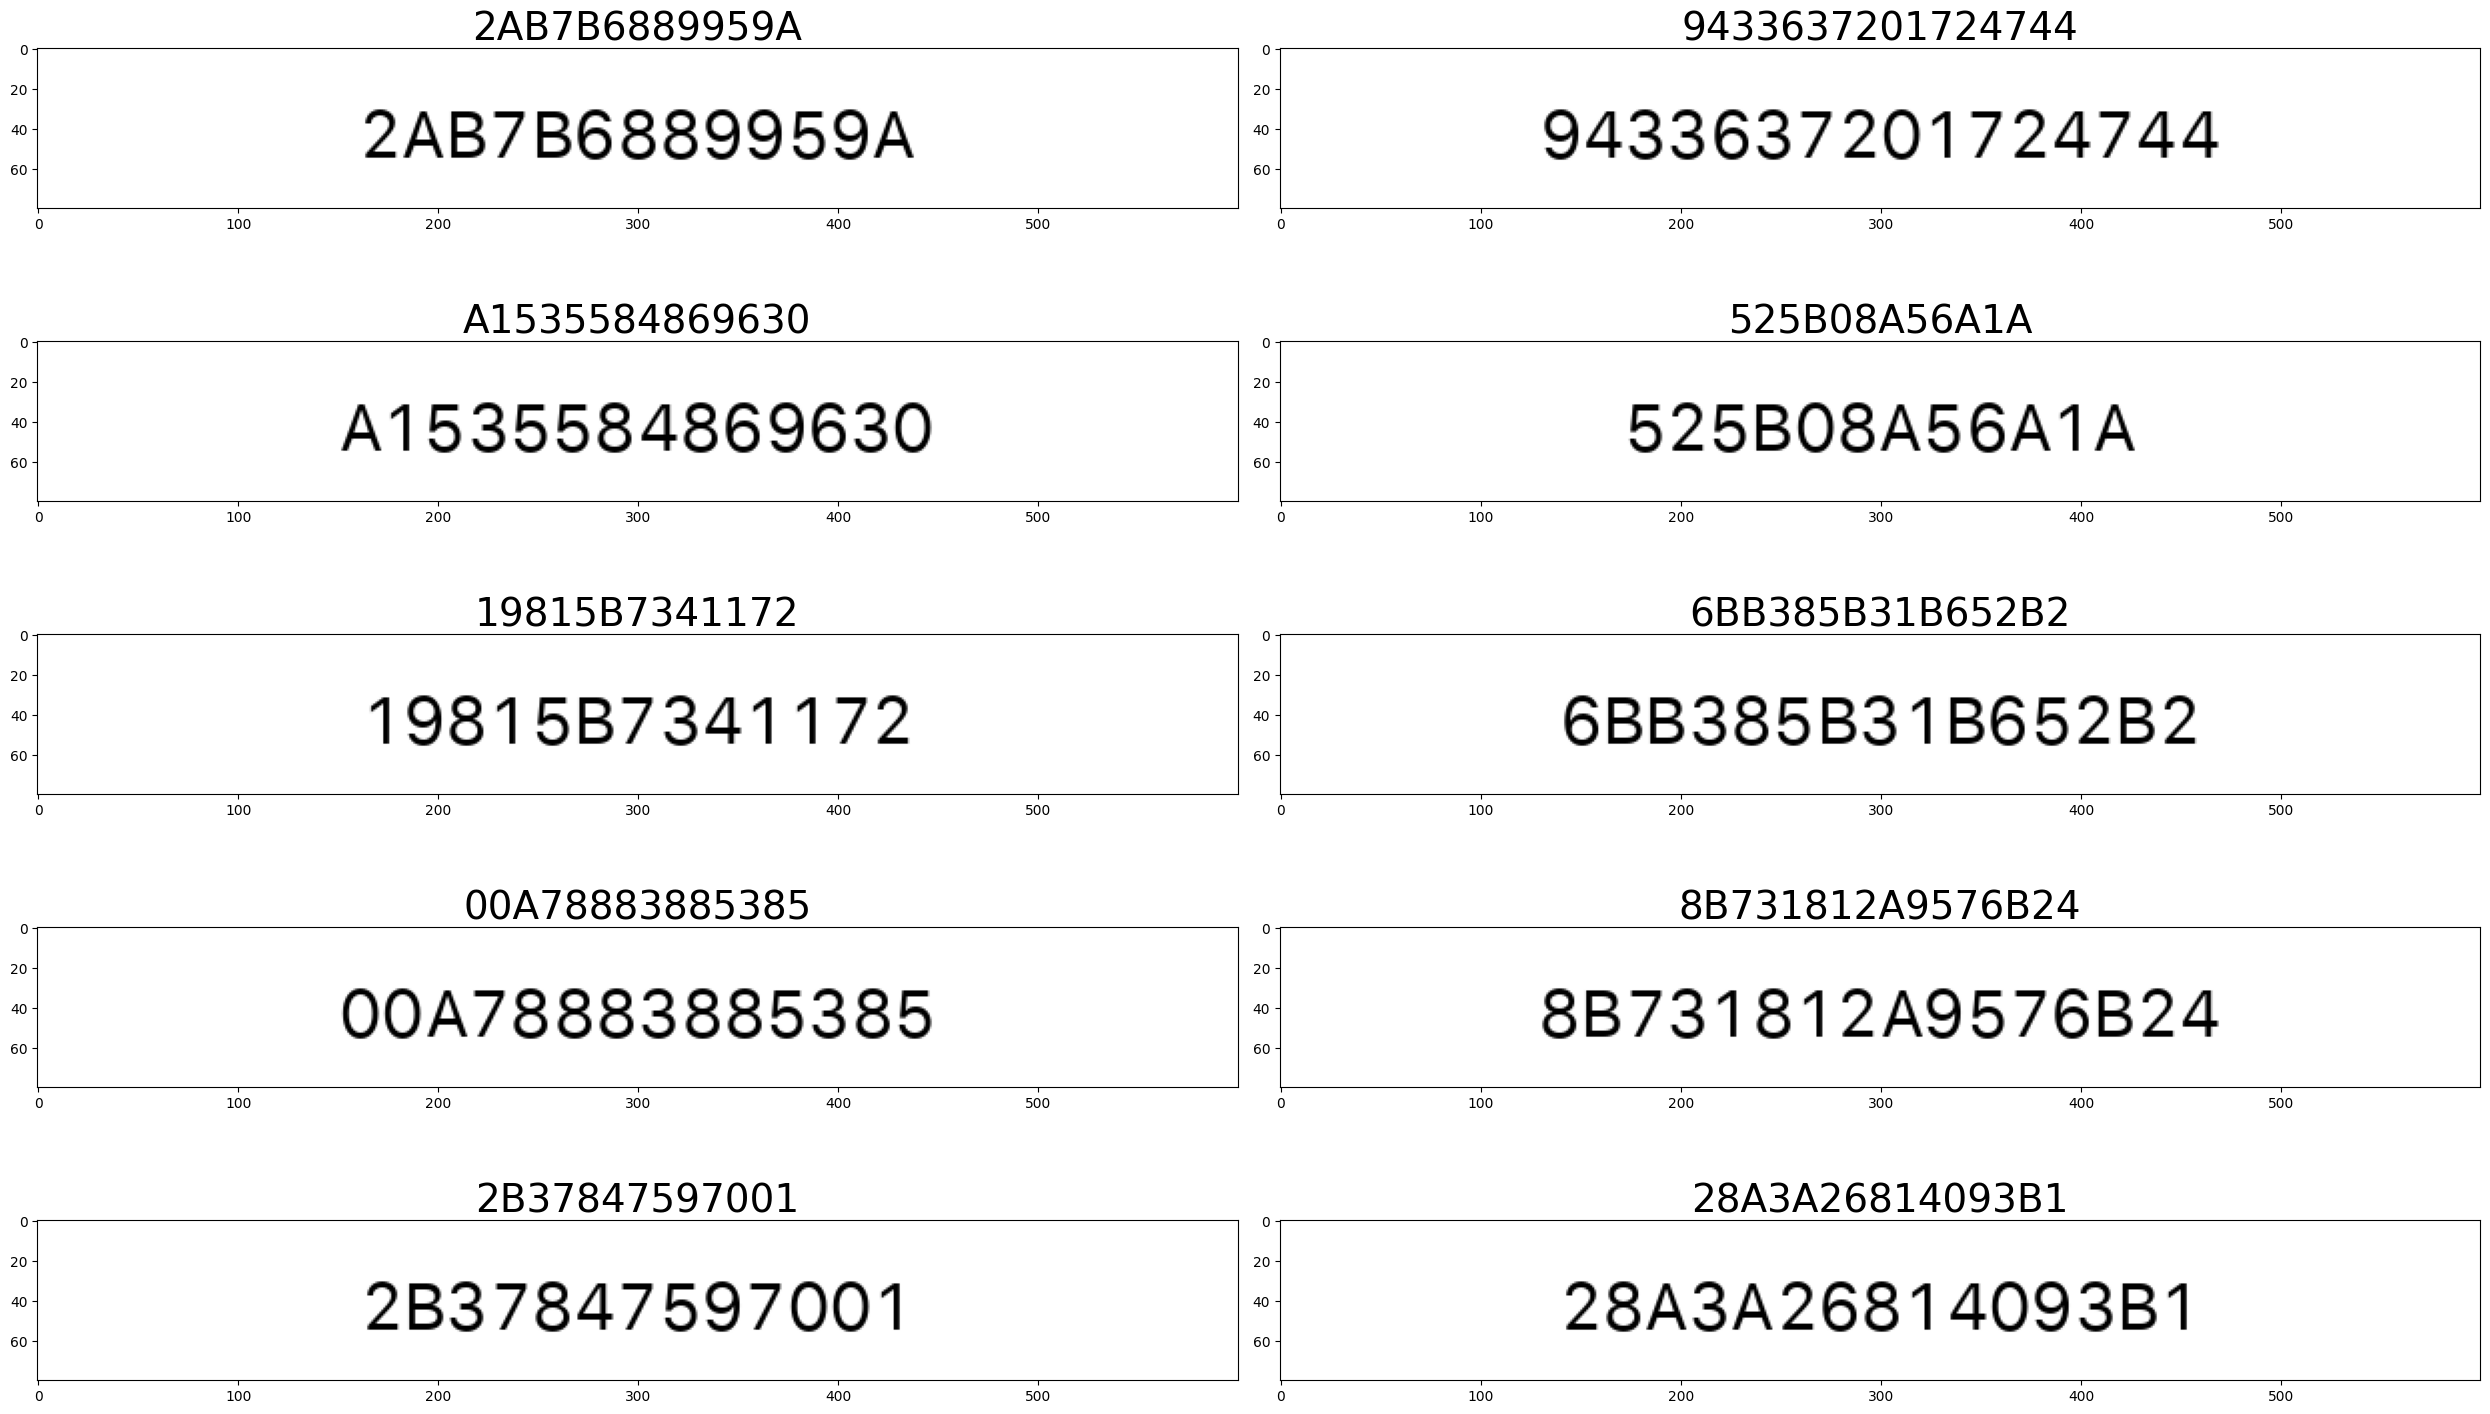

In [7]:
# all_chars = 
# strings, labels = generate_strings_in_batch(all_chars, 10, 14, 2)
# all_img = generate_images_from_strings(strings)

gendata = DataGenerator("0123456789AB", 10)
imgs, strings = gendata.__getitem__(0)

def show_img_and_text(images, text, ncols, nrows, figsize=(25,15)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(text[i], fontsize=28)

    plt.tight_layout()
    

show_img_and_text(imgs, strings, 2, 5)